<h1 style="property:value;color:LightSeaGreen;font-size:300%;text-align:center; ">Kariman Karm Mohamed Mousaa </h1>

# CISC-873-DM-F22-A1
### A1 Wish.com Product Rating Prediction
This assignment, you will be working with a tabular dataset. The dataset is not clean, and you will need some preprocessing depending on the models of your choice. The dataset is the wish.com product dataset. We collected the data combined with some available data. Some nosies are added to the dataset. The goal is to predict the product ratings given the other features known for a product on Wish.com. Ratings are in categories from 1 to 5. For one product, the higher the rating is, the more the customers like the product. In this way, when you have a new product to be put on wish.com, you can estimate how likely people will like your product, without actually listing out there. Also, by doing this, it helps us to understand under what certain conditions that a product will be highly rated, as a way to understand the customer base of the wish.com.

You are encouraged to use the Google Colab environment for this assignment to run your experiments through Jupiter Notebook.

<img src="https://www.grazitti.com/assets/2016/05/Meme.jpg" alt="Girl in a jacket" width="500" height="600" text-align=center>

## 🌈 Why Data Mining is a misnomer? What is another preferred name?
### answer: because it's a process extracting iformation from data not extraction the data itself, so preferred named data analysis
---------------------------------------------------------------------------------------------
## 🌈 What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
### answer: knowledge discovery process, it's process of finding knowledge in data and used particular data minig methods, it's interested in ML,AI, pattern recognition, statistics, expert systems and data visualization.
### data engineer:comes from a strong technical background, typically in one of the STEM fields such as math or statistics. They possess a master’s degree in data and a wealth of knowledge in programming languages such as Java and Python as well as SQL and NoSQL database systems. 
### data scientist:While data engineers are focused on building and maintaining data infrastructures, data scientists tackle the data and interpret them. Data scientists typically come from technical backgrounds such as computer science, statistics, and mathematics. While most data scientists acquire a master’s degree in data science, it is not a requirement. 
---------------------------------------------------------------------------------------------
## 🌈In data mining, what is the difference between prediction and categorization?
### answer: prediction: it's continuous values, it's regression model is built to predict the outcome.
### categorization: it's discrete values,it's about determining a (categorial) class (or label) for an element in a dataset.
---------------------------------------------------------------------------------------------
## 🌈 Why data science/machine learning is a bad idea in the context of information security?
### answer:In the field of information security, when you come up with new knowledge that I did not know before, information security experts work to apply it in a new way, not something like it to be somewhat secure, and this is what they can't do with data science/machine learning.
---------------------------------------------------------------------------------------------
## 🌈What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
### answer: CIA principle is Confidentiality, integrity and availability, it's a model designed to guide policies for information security within an organization. 
### follow this order to protect information stored, Keep information secret (Confidentiality),Maintain the expected, accurate state of that information (Integrity),Ensure the information and services are up and running (Availability).
--------------------------------------------------------------------------
#### The hardest challenge for me was to clean the text data, as there are many features here. I think that NLP should be used to deal with it. I tried as much as possible to solve the problem, but I think I wanted to have time to learn and do it.

In [7]:
#import basic libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
#load data 
data=pd.read_csv('train_new.csv')
test=pd.read_csv('test_new.csv')
data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


## Exploratory Data Analysis (EDA)

In [9]:
data.shape

(1094, 34)

In [10]:
#DROP ID because not order not usefull
data.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [11]:
data

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08


In [12]:
#get unique values in currency_buyer (it has one value that is not usefull)
np.unique(data['currency_buyer']) 

array(['EUR'], dtype=object)

In [13]:
#get unique values in theme
np.unique(data['theme'])

array(['summer'], dtype=object)

In [14]:
#get unique values in crawl_month
np.unique(data['crawl_month'])

array(['2020-08'], dtype=object)

In [15]:
#count all values in merchant_profile_picture
data['merchant_profile_picture'].value_counts()

https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5acaf29d5ebcfd72403106a8.jpg    8
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55c8a4c33a698c6010edcd9e.jpg    6
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5533c83986ff95173dc017d0.jpg    6
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_58ad449708de0c6dc59d9e06.jpg    5
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg    4
                                                                                                      ..
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5756d060b833235cbc250227.jpg    1
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5541ba455252290c0b225b1f.jpg    1
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_565537c7a9a8a4572be0bef5.jpg    1
https://s3-us-west-1.amazonaws.com/sweeper-production-m

In [16]:
#make copy of data to drop data 
df = data.copy()
tst=test.copy()

In [17]:
#get all information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [18]:
#drop currency_buyer, theme and crawl_month that have only one value and merchant_profile_picture, has_urgency_banner and urgency_text most data is null 
df.drop(['currency_buyer','theme','crawl_month','merchant_profile_picture','has_urgency_banner','urgency_text'],axis=1,inplace=True)
tst.drop(['currency_buyer','theme','crawl_month','merchant_profile_picture','has_urgency_banner','urgency_text'],axis=1,inplace=True)

In [19]:
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,30,50,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,37,50,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0
2,6.00,34,100,0,4.0,10,0,0,0,0,...,41,50,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0
3,4.67,4,100,1,3.0,82,0,0,0,0,...,25,50,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,15,50,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,...,41,50,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0
1090,5.00,5,1000,0,5.0,377,1,0,1,0,...,35,50,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0
1091,9.00,48,1000,1,4.0,135,0,0,0,0,...,25,50,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,...,45,50,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0


# Preprocessing for Categorical data

In [20]:
#count all values in origin_country
df['origin_country'].value_counts()

CN    1054
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

In [21]:
#count all values in merchant_name
df['merchant_name'].value_counts()

greatexpectationstechnology    8
广州唯适唯服饰有限公司                    7
smarthomeinternationalcoltd    6
fengjinying                    6
sangboostore                   6
                              ..
wwenliping                     1
yourvogue                      1
caohongbo                      1
bumanke003                     1
oiug56465                      1
Name: merchant_name, Length: 746, dtype: int64

In [22]:
#try to replace the noise value by transalat the values 
df['merchant_name'].replace("广州唯适唯服饰有限公司","GuangzhouWeishiweiClothingcoltd",inplace=True)

df['merchant_name'].replace("上海铭启电气科技有限公司","ShanghaiMingqiElectricTechnologycoltd",inplace=True)

df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,30,50,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,37,50,CN,shanghaimingqidianqikejiyouxiangongsi,ShanghaiMingqiElectricTechnologycoltd,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0
2,6.00,34,100,0,4.0,10,0,0,0,0,...,41,50,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0
3,4.67,4,100,1,3.0,82,0,0,0,0,...,25,50,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,15,50,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0


In [23]:
#try to find relation between 'merchant_title' and 'merchant_name'
df[['merchant_title','merchant_name']]

,merchant_title,merchant_name
0,keepahorse,keepahorse
1,shanghaimingqidianqikejiyouxiangongsi,ShanghaiMingqiElectricTechnologycoltd
2,zhaodongmei,zhaodongmei
3,pookie0331,pookie0331
4,shitongyi12683626,shitongyi12683626
...,...,...
1089,fantastic_tune,fantastic_tune
1090,zzbllss,zzbllss
1091,OIUG 56465,oiug56465
1092,yubenqiang,yubenqiang


In [24]:
#get data when merchant_title=='Suyi Technology'
df[df['merchant_title']=='Suyi Technology']

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture
71,5.65,6,1000,1,4.0,164,0,0,0,0,...,23,50,CN,Suyi Technology,greatexpectationstechnology,"86 % avis positifs (12,309 notes)",12309,4.04517,5acaf29d5ebcfd72403106a8,1
125,2.00,2,10000,1,4.0,980,0,0,0,0,...,23,50,CN,Suyi Technology,greatexpectationstechnology,"86 % avis positifs (12,309 notes)",12309,4.04517,5acaf29d5ebcfd72403106a8,1
343,7.00,6,100,1,4.0,18,0,0,0,0,...,23,50,CN,Suyi Technology,greatexpectationstechnology,"86 % avis positifs (12,309 notes)",12309,4.04517,5acaf29d5ebcfd72403106a8,1
398,5.65,6,1000,1,4.0,164,0,0,0,0,...,23,50,CN,Suyi Technology,greatexpectationstechnology,"86 % avis positifs (12,309 notes)",12309,4.04517,5acaf29d5ebcfd72403106a8,1
451,7.00,6,100,1,4.0,18,0,0,0,0,...,23,50,CN,Suyi Technology,greatexpectationstechnology,"86 % avis positifs (12,309 notes)",12309,4.04517,5acaf29d5ebcfd72403106a8,1
648,8.00,7,5000,1,4.0,219,0,0,0,0,...,23,50,CN,Suyi Technology,greatexpectationstechnology,"86 % avis positifs (12,309 notes)",12309,4.04517,5acaf29d5ebcfd72403106a8,1
1078,8.00,7,20000,1,4.0,2189,0,0,0,0,...,23,50,CN,Suyi Technology,greatexpectationstechnology,"86 % avis positifs (12,309 notes)",12309,4.04517,5acaf29d5ebcfd72403106a8,1
1093,7.00,6,1000,1,3.0,141,0,0,0,0,...,23,50,CN,Suyi Technology,greatexpectationstechnology,"86 % avis positifs (12,309 notes)",12309,4.04517,5acaf29d5ebcfd72403106a8,1


In [19]:
df[['merchant_title']].head(50)

,merchant_title
0,keepahorse
1,shanghaimingqidianqikejiyouxiangongsi
2,zhaodongmei
3,pookie0331
4,shitongyi12683626
5,pashesa
6,bestwsih4u
7,xiakeliuxingfushi
8,Lees Closet
9,ailla clothing


In [25]:
#drop 'merchant_name' because there is 'merchant_title' have the same values
df.drop(['merchant_name'],axis=1,inplace=True)
tst.drop(['merchant_name'],axis=1,inplace=True)

df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,0,30,50,CN,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,0,37,50,CN,shanghaimingqidianqikejiyouxiangongsi,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0
2,6.00,34,100,0,4.0,10,0,0,0,0,...,0,41,50,CN,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0
3,4.67,4,100,1,3.0,82,0,0,0,0,...,0,25,50,CN,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,0,15,50,CN,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0


In [21]:
#get merchant_id and merchant_title
df[['merchant_id','merchant_title']]

,merchant_id,merchant_title
0,577fb2b368116418674befd9,keepahorse
1,566a3ef17233ff2686443082,shanghaimingqidianqikejiyouxiangongsi
2,5aacd6c1ccf0c83e5a6f3de0,zhaodongmei
3,583141fbfef4094e51453d9b,pookie0331
4,5d3bc9f8e13a7e654424a4cb,shitongyi12683626
...,...,...
1089,53f2db3c104dae6bcae0c271,fantastic_tune
1090,592968ba63950d682ca4b195,zzbllss
1091,5b6ec2f2838d931d2fbf7a28,OIUG 56465
1092,58330d7def56284f7634e5e5,yubenqiang


In [22]:
#see example if ['merchant_title']=='keepahorse' and see the relation between merchant_title,merchant_info_subtitle,merchant_id
df[df['merchant_title']=='keepahorse']

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,0,30,50,CN,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1
139,5.74,5,100,1,4.0,58,0,0,0,0,...,0,30,50,CN,keepahorse,"(66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1
1013,9.00,8,10000,1,4.0,1982,0,0,0,0,...,0,30,50,CN,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1
1084,2.66,3,100,1,3.0,12,0,0,0,0,...,0,30,50,CN,keepahorse,"(66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1


In [23]:
#drop merchant_id,merchant_info_subtitle because there is merchant_title identified  merchant 
df.drop(["merchant_info_subtitle","merchant_id"], axis=1,inplace=True)
tst.drop(["merchant_info_subtitle","merchant_id"], axis=1,inplace=True)

<AxesSubplot:xlabel='origin_country', ylabel='rating'>

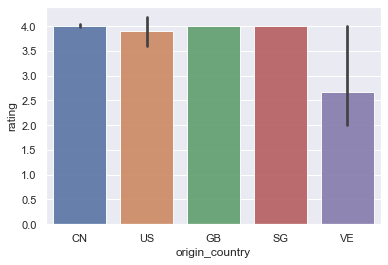

In [24]:
#draw relation between rating and origin_country by barplot
sns.set(style="darkgrid")
sns.barplot(df.origin_country, df.rating, alpha=0.9)

In [25]:
#count all values in shipping_option_name
df['shipping_option_name'].value_counts()

Livraison standard         1047
Standard Shipping            16
Envio Padrão                  6
الشحن القياسي                 4
Expediere Standard            4
Envío normal                  3
Standardversand               3
Livraison Express             3
Standardowa wysyłka           2
Standart Gönderi              2
Стандартная доставка          2
Spedizione standard           1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

In [26]:
#drop shipping_option_name many values in deffierent languages but have the same values (Standard Shipping) sp that not usefull 
df.drop("shipping_option_name",axis=1,inplace=True)
tst.drop("shipping_option_name",axis=1,inplace=True)

In [27]:
#get categorical data
df[['tags','product_color','product_variation_size_id','rating']]

,tags,product_color,product_variation_size_id,rating
0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,4.0
1,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,4.0
2,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,4.0
3,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,3.0
4,"Summer,Floral print,women dresses,fashion dres...",apricot,S,4.0
...,...,...,...,...
1089,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,4.0
1090,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,5.0
1091,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,4.0
1092,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,4.0


In [1]:
#trial 2
#count all values in product_variation_size_id and get all unique values 
#df['product_variation_size_id'].value_counts()
df['product_variation_size_id'].unique()

NameError: name 'df' is not defined

In [29]:
#trial 2
#convert all letter to lower case and replace all symbols to space and conert all size to some ordinal categorical 
df['product_variation_size_id'] = df['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('2xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('3xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('4xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('5xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('6xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('x   l', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('sizel', 'l')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('size4xl', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('x   l', 'xl')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('1 pc - xl', 'xl')
def change_size(cl):
    if cl in 'xl,l,s,xs,m,xxl,xxxs,xxxxxl,xxxxl'.split(','):
        return cl
    else:
        return 'other'

df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, 'other')
df['product_variation_size_id'] = df['product_variation_size_id'].apply(change_size)
#for test

tst['product_variation_size_id'] = tst['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')
tst['product_variation_size_id'] = tst['product_variation_size_id'].replace('2xl', 'xl')
tst['product_variation_size_id'] = tst['product_variation_size_id'].replace('3xl', 'xl')
tst['product_variation_size_id'] = tst['product_variation_size_id'].replace('4xl', 'xl')
tst['product_variation_size_id'] = tst['product_variation_size_id'].replace('5xl', 'xl')
tst['product_variation_size_id'] = tst['product_variation_size_id'].replace('6xl', 'xl')
tst['product_variation_size_id'] = tst['product_variation_size_id'].replace('x   l', 'xl')
tst['product_variation_size_id'] = tst['product_variation_size_id'].replace('sizel', 'l')
tst['product_variation_size_id'] = tst['product_variation_size_id'].replace('size4xl', 'xl')
tst['product_variation_size_id'] = tst['product_variation_size_id'].replace('x   l', 'xl')
tst['product_variation_size_id'] = tst['product_variation_size_id'].replace('1 pc - xl', 'xl')
def change_size(cl):
    if cl in 'xl,l,s,xs,m,xxl,xxxs,xxxxxl,xxxxl'.split(','):
        return cl
    else:
        return 'other'

tst['product_variation_size_id'] = tst['product_variation_size_id'].replace(np.nan, 'other')
tst['product_variation_size_id'] = tst['product_variation_size_id'].apply(change_size)

In [30]:
#trial 1
#replace all noise values 
#df['product_variation_size_id']=df['product_variation_size_id'].str.title()
#df['product_variation_size_id'].str.lower()
#df['product_variation_size_id']=df['product_variation_size_id'].str.strip()
#df['product_variation_size_id'].replace("Size S.","S" ,inplace=True)
#df['product_variation_size_id'].replace(["Us-S","Pants-S"],"S" ,inplace=True)
#df['product_variation_size_id'].replace(["Us-S","Pants-S"],"S" ,inplace=True)
#df['product_variation_size_id'].replace(["S.."],"S" ,inplace=True)
#tst['product_variation_size_id']=tst['product_variation_size_id'].str.title()
#tst['product_variation_size_id']=tst['product_variation_size_id'].str.strip()
#tst['product_variation_size_id'].replace("Size S.","S" ,inplace=True)
#tst['product_variation_size_id'].replace(["Us-S","Pants-S"],"S" ,inplace=True)
#tst['product_variation_size_id'].replace(["Us-S","Pants-S"],"S" ,inplace=True)
#tst['product_variation_size_id'].replace(["S.."],"S" ,inplace=True)

In [31]:
#trial 1
#drop noise values
#df[df["product_variation_size_id"]=='34']
#df[df["product_variation_size_id"]=='Floating Chair For Kid']

In [32]:
#trial 1
#drop noise values 
#df.drop(470,axis=0,inplace=True)
#df.drop(408,axis=0,inplace=True)

In [33]:
#drop tags because that need NLP processing to solve problems
df.drop("tags",axis=1,inplace=True)
tst.drop("tags",axis=1,inplace=True)

In [34]:
#trial 1
#get frequent values 
#df[['product_color','product_variation_size_id','origin_country']].value_counts().index[0]
#tst[['product_color','product_variation_size_id','origin_country']].value_counts().index[0]

In [35]:
#count all values in product_color
df['product_color'].value_counts()

black             219
white             173
blue               77
yellow             69
pink               68
                 ... 
claret              1
brown & yellow      1
whitestripe         1
Pink                1
light green         1
Name: product_color, Length: 87, dtype: int64

In [36]:
#trial 2
#sorrt product_color and dropna and covert all to lower case 
np.sort(df['product_color'].dropna().unique())
df['product_color']=df['product_color'].str.lower()
df[df['product_color'].str.contains('&', na=False)]['product_color'].unique()

array(['white & green', 'pink & black', 'pink & white', 'black & yellow',
       'navyblue & white', 'black & blue', 'black & green',
       'white & black', 'black & white', 'pink & blue', 'brown & yellow',
       'blue & pink', 'winered & yellow', 'pink & grey'], dtype=object)

In [37]:
#trial 2
#creat dict for  degree color  and relpace all this degree to orginal color and replace all values not in corpus to others
shade_to_color = {
    'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'lakeblue': 'blue', 'darkblue': 'blue', 'denimblue': 'blue', 'navy blue': 'blue', 'prussianblue': 'blue',
    'navy': 'blue',
    'armygreen': 'green', 'army green': 'green', 'fluorescentgreen': 'green', 'mintgreen': 'green', 'light green': 'green', 'lightgreen': 'green',
    'applegreen': 'green', 'darkgreen': 'green', 'army': 'green', 'khaki': 'green', 'lightkhaki': 'green',
    'lightyellow': 'yellow', 
    'winered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'rose red': 'red', 'watermelonred': 'red', 'orange-red': 'red', 'rosered': 'red',
    'claret': 'red', 'burgundy': 'red', 
    'gray': 'grey', 'silver': 'grey','lightgray': 'grey', 'lightgrey': 'grey', 'greysnakeskinprint': 'grey',
    'coffee': 'brown', 'camel': 'brown', 'tan': 'brown', 
    'offwhite': 'white', 'ivory': 'white', 'nude': 'white',
    'lightpink': 'pink', 'dustypink':'pink', 'rosegold': 'pink',
    'lightpurple': 'purple', 'coolblack': 'black', 'apricot': 'orange', 'offblack': 'black'
}
def update_color(col):
    if shade_to_color.get(col, False):
        return shade_to_color.get(col)
    elif '&' in col:
        return 'dual'
    elif col in shade_to_color.values():
        return col
    else:
        return 'other'

df['product_color'].replace(np.nan, 'others', inplace=True)

df['product_color'] = df.product_color.apply(update_color)
df['product_color'].value_counts()

black     224
white     179
blue      122
green     106
red        96
pink       76
yellow     70
other      68
grey       57
purple     37
dual       30
orange     17
brown      12
Name: product_color, dtype: int64

In [38]:
#trial 1
# replace nan values by frequent values 
#df=df.fillna({'product_color':'black','product_variation_size_id':'S','origin_country':'CN'} )
#tst=tst.fillna({'product_color':'white','product_variation_size_id':'S','origin_country':'CN'})

In [39]:
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,50,3,0,30,50,CN,keepahorse,66644,4.137582,1
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,50,3,0,37,50,CN,shanghaimingqidianqikejiyouxiangongsi,25752,4.256873,0
2,6.00,34,100,0,4.0,10,0,0,0,0,...,50,2,0,41,50,CN,zhaodongmei,3897,3.928920,0
3,4.67,4,100,1,3.0,82,0,0,0,0,...,5,1,0,25,50,CN,pookie0331,7497,4.079365,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,50,3,0,15,50,CN,shitongyi12683626,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,...,50,1,0,41,50,CN,fantastic_tune,230951,4.311066,0
1090,5.00,5,1000,0,5.0,377,1,0,1,0,...,31,2,0,35,50,CN,zzbllss,2904,4.422521,0
1091,9.00,48,1000,1,4.0,135,0,0,0,0,...,50,3,0,25,50,CN,OIUG 56465,6632,3.748794,0
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,...,50,2,0,45,50,CN,yubenqiang,5816,3.936382,0


In [40]:
#trial 1
#convert categorical to numerical by encoder  
#from sklearn.preprocessing import OneHotEncoder

#ord_enc = OneHotEncoder()
#df[["origin_country","merchant_title","product_variation_size_id","product_color"]] = ord_enc.fit_transform(df[["origin_country","merchant_title","product_variation_size_id","product_color"]])
#tst[["origin_country","merchant_title","product_variation_size_id","product_color"]] = ord_enc.fit_transform(tst[["origin_country","merchant_title","product_variation_size_id","product_color"]])
#trial 2
categorical_columns = ["origin_country","merchant_title","product_variation_size_id","product_color"]
for column in categorical_columns:
    temp = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=temp,
        left_index=True,
        right_index=True,
    )
    tst= pd.merge(
        left=tst,
        right=temp,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
    tst = tst.drop(columns=column)

In [41]:
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_color_dual,product_color_green,product_color_grey,product_color_orange,product_color_other,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.00,34,100,0,4.0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4.67,4,100,1,3.0,82,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1090,5.00,5,1000,0,5.0,377,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1091,9.00,48,1000,1,4.0,135,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocessing for Numerical data¶

In [42]:
#get the relation between the numerical columns
df.corr()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_color_dual,product_color_green,product_color_grey,product_color_orange,product_color_other,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow
price,1.000000,0.321920,-0.008284,-0.053380,0.226129,0.012339,0.086400,0.088888,0.021911,0.109321,...,0.031029,-0.074545,-0.087926,-0.039367,0.078591,-0.012172,-0.037280,0.043646,-0.028420,0.019740
retail_price,0.321920,1.000000,0.027722,-0.006258,0.086251,0.078602,0.022785,0.029140,-0.001645,0.040533,...,-0.014150,-0.002963,-0.063219,0.078092,0.024484,-0.043443,0.004717,-0.014672,0.038441,-0.053092
units_sold,-0.008284,0.027722,1.000000,-0.018159,0.011729,0.891939,0.042773,-0.001555,0.049948,0.012160,...,-0.019440,-0.016536,0.054929,0.032953,0.034946,-0.050084,0.035387,-0.025409,-0.009431,-0.069994
uses_ad_boosts,-0.053380,-0.006258,-0.018159,1.000000,-0.047359,-0.050653,0.020953,0.052719,-0.008984,0.023487,...,-0.022266,0.063435,-0.038561,-0.035059,0.012225,-0.006235,-0.020386,-0.042431,-0.011931,0.013080
rating,0.226129,0.086251,0.011729,-0.047359,1.000000,0.025344,0.234001,0.009850,0.273749,0.042029,...,0.065089,0.012255,0.032566,-0.013997,0.068321,-0.039832,0.023867,-0.047537,-0.051262,0.003522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
product_color_pink,-0.012172,-0.043443,-0.050084,-0.006235,-0.039832,-0.054758,0.003265,-0.012023,0.021848,-0.029963,...,-0.045880,-0.089497,-0.064059,-0.034328,-0.070342,1.000000,-0.051121,-0.084743,-0.120851,-0.071438
product_color_purple,-0.037280,0.004717,0.035387,-0.020386,0.023867,0.016406,-0.003304,0.010679,-0.001423,-0.020517,...,-0.031416,-0.061283,-0.043864,-0.023506,-0.048166,-0.051121,1.000000,-0.058027,-0.082752,-0.048917
product_color_red,0.043646,-0.014672,-0.025409,-0.042431,-0.047537,-0.040526,0.000288,0.027247,-0.011528,-0.004197,...,-0.052079,-0.101589,-0.072714,-0.038966,-0.079846,-0.084743,-0.058027,1.000000,-0.137179,-0.081090
product_color_white,-0.028420,0.038441,-0.009431,-0.011931,-0.051262,-0.010883,-0.010304,0.028165,-0.025853,-0.002897,...,-0.074269,-0.144874,-0.103696,-0.055569,-0.113867,-0.120851,-0.082752,-0.137179,1.000000,-0.115642


In [43]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_color_dual,product_color_green,product_color_grey,product_color_orange,product_color_other,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,...,0.027422,0.096892,0.052102,0.015539,0.062157,0.069470,0.033821,0.087751,0.163620,0.063985
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,...,0.163385,0.295946,0.222335,0.123741,0.241551,0.254368,0.180850,0.283062,0.370099,0.244839
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#get unique values in theme
np.unique(df['merchant_has_profile_picture'])

array([0, 1], dtype=int64)

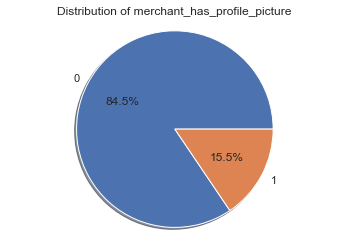

In [45]:
#get the distribution of merchant_has_profile_picture
labels=df['merchant_has_profile_picture'].astype('category').cat.categories.tolist()
counts=df.merchant_has_profile_picture.value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Distribution of merchant_has_profile_picture')
plt.show()

In [46]:
#group the data by 'merchant_has_profile_picture' and 'rating'
df.groupby(['merchant_has_profile_picture','rating']).count()

price  retail_price  units_sold  \
merchant_has_profile_picture rating                                    
0                            1.0         2             2           2   
                             2.0        12            12          12   
                             3.0       119           119         119   
                             4.0       643           643         643   
                             5.0       147           147         147   
                             6.0         1             1           1   
1                            3.0        16            16          16   
                             4.0       131           131         131   
                             5.0        23            23          23   

                                     uses_ad_boosts  rating_count  \
merchant_has_profile_picture rating                                 
0                            1.0                  2             2   
                             2.0                 12            12   
                             3.0                119           119   
                             4.0                643           643   
                             5.0                147           147   
                             6.0                  1             1   
1                            3.0                 16            16   
                             4.0                131           131   
                             5.0                 23            23   

                                     badges_count  badge_local_product  \
merchant_has_profile_picture rating                                      
0                            1.0                2                    2   
                             2.0               12                   12   
                             3.0              119                  119   
                             4.0              643                  643   
                             5.0              147                  147   
                             6.0                1                    1   
1                            3.0               16                   16   
                             4.0              131                  131   
                             5.0               23                   23   

                                     badge_product_quality  \
merchant_has_profile_picture rating                          
0                            1.0                         2   
                             2.0                        12   
                             3.0                       119   
                             4.0                       643   
                             5.0                       147   
                             6.0                         1   
1                            3.0                        16   
                             4.0                       131   
                             5.0                        23   

                                     badge_fast_shipping  \
merchant_has_profile_picture rating                        
0                            1.0                       2   
                             2.0                      12   
                             3.0                     119   
                             4.0                     643   
                             5.0                     147   
                             6.0                       1   
1                            3.0                      16   
                             4.0                     131   
                             5.0                      23   

                                     product_variation_inventory  ...  \
merchant_has_profile_picture rating                               ...   
0                            1.0                               2  ...   
                             2.0                              12  ...   
                             3.0 

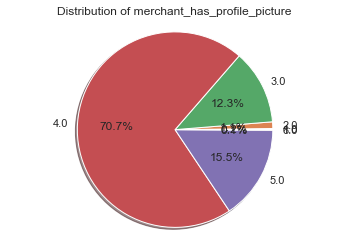

In [47]:
#get the distribution of rating
labels=df['rating'].astype('category').cat.categories.tolist()
counts=df.rating.value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Distribution of merchant_has_profile_picture')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

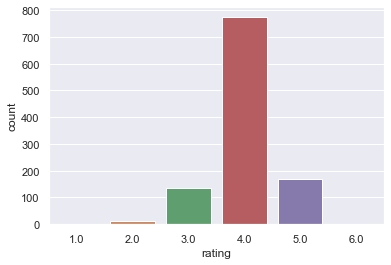

In [48]:
sns.countplot(df.rating)

In [49]:
#drop samll corr columns
df.drop(['badge_local_product','units_sold','merchant_has_profile_picture'],axis=1,inplace=True)
tst.drop(['badge_local_product','units_sold','merchant_has_profile_picture'],axis=1,inplace=True)

In [50]:
var=pd.read_csv('sample_submission_new.csv')
var.head()

,id,rating
0,937,4.0
1,270,4.0
2,308,4.0
3,913,4.0
4,403,4.0


# Modeling

In [51]:
#split data to x,y
x=df.drop('rating',axis=1)
y=df['rating']

In [52]:
#Normalizing and selecting data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
t = preprocessing.normalize(x)
te=preprocessing.normalize(tst)
names = x.columns.values.tolist()
x = pd.DataFrame(t, columns = names)
ts = StandardScaler().fit_transform(te)

In [53]:
x.shape

(1094, 789)

In [54]:
#Splitting data to train ,validation and Test (80,10,10)
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
X_train, X_both, y_train, y_both = train_test_split(x, y, test_size = 0.2, random_state=3)
X_test, X_valid, y_test, y_valid = train_test_split(X_both, y_both, test_size = 0.5, random_state=3)

In [55]:
#naive bayes model
gb = GaussianNB()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)
print(f"f1_score={f1_score(y_valid, y_pred,average='micro')}")

f1_score=0.24545454545454545


In [56]:
pred_test = gb.predict(ts)
pred_df = pd.DataFrame({'id':var['id'], 'rating': pred_test})
pred_df.to_csv('pred_walkthrough.csv', index=False)

In [57]:
#trial 1 with random_state=0 and trial 2 with random_state=10 
#Decision Trees
dtree = DecisionTreeClassifier(random_state=10)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_valid)
print(f"f1_score={f1_score(y_valid, y_pred,average='micro')}")

f1_score=0.7636363636363637


In [58]:
pred_test = dtree.predict(ts)
pred_df = pd.DataFrame({'id':var['id'], 'rating': pred_test})
pred_df.to_csv('predt.csv', index=False)

In [ ]:
#trial 1 with random_state=4,'max_features': np.arange(1,20),'max_depth': np.arange(1,20) and trial 2 with random_state=10 ,'max_features': np.arange(1,40),'max_depth': np.arange(1,40)
#find the optimal hyperparameters
dtreeparam_grid = {
    'max_depth': np.arange(1,40),
    'max_features': np.arange(1,40),
    'random_state': [42]
}
dtree_search = GridSearchCV(dtree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=25)
dtree_search.fit(X_train , y_train)
all_param = []
all_param = list(dtree_search.best_params_.values())
dtree = DecisionTreeClassifier(criterion = "entropy", max_depth= all_param[0], max_features =all_param[1], random_state=3)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_valid)
print(f"f1_score={f1_score(y_valid, y_pred,average='micro')}")

In [ ]:
pred_test = dtree.predict(ts)
pred_df = pd.DataFrame({'id':var['id'], 'rating': pred_test})
pred_df.to_csv('preddt.csv', index=False)

In [ ]:
#Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
print(f"f1_score={f1_score(y_valid, y_pred,average='micro')}")

In [ ]:
pred_test =  svc.predict(ts)
pred_df = pd.DataFrame({'id':var['id'], 'rating': pred_test})
pred_df.to_csv('predttsv.csv', index=False)

In [ ]:
#trial 1 with random_state=4,'degree': np.arange(1,20),'C': np.arange(0,4) and trial 2 with random_state=42 ,'degree': np.arange(1,40)
#find the optimal hyperparameters
svcparam_grid = {
    'kernel': ['poly','rbf','sigmoid'],
    'degree': np.arange(1,20),
    'random_state':[42],
    'C': np.arange(0,4),
    'gamma':['scale', 'auto']
}
svc_search = GridSearchCV(svc, param_grid = svcparam_grid, refit = True, verbose = 1, cv=25)
svc_search.fit(X_train , y_train)
svc_search.best_params_
all_param = []
all_param = list(svc_search.best_params_.values())
svc = SVC(C =all_param[0], degree= all_param[1], gamma=all_param[2], kernel = all_param[3], random_state=3)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
print(f"f1_score={f1_score(y_valid, y_pred,average='micro')}")

In [ ]:
pred_test =  svc.predict(ts)
pred_df = pd.DataFrame({'id':var['id'], 'rating': pred_test})
pred_df.to_csv('predtssv.csv', index=False)